#1 General infomation
* Members:
  1. Dương Đức Nghĩa - 2011671
* Datasets:
  * [***Golden Foot Football players Image Dataset*** (Classification of 23 golden football players)](https://www.kaggle.com/datasets/balabaskar/golden-foot-football-players-image-dataset)
  <!-- * Note[removed from your report]: 
    * You have to uploaded ***your dataset*** (should be different to Animals10) to somewhere and put its link here; so, the code followed can download the dataset
    * Cells followed must show many different views about the dataset (goal: show that you can ***sense*** the dataset) -->
* Backbone:
  * [***EfficientNet*** (https://arxiv.org/abs/1905.11946)](https://arxiv.org/abs/1905.11946)
  * Note[removed from your report]: 
    * Cells followed must show many different views about the backbone and it's performance in classification on your dataset.
    * Should present (display) featured obatained from different points inside the backbone.
    * Should use site ***imBB*** (as shown in the following link) to host your picture and then put the pictures to your report


***The figure below is just for reference on how to use html code show to picture***


<a href="https://ibb.co/48NV1L9"><img src="https://i.ibb.co/GWP5HDB/Noron.png" alt="Noron" border="0"></a>



#2 Data Preparation and more (from here)
 

# Mục mới

In [ ]:
!grep MemTotal /proc/meminfo

MemTotal:       13297200 kB


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle datasets download -d balabaskar/golden-foot-football-players-image-dataset

golden-foot-football-players-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "/content/golden-foot-football-players-image-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
path_to_data = './content/football_golden_foot'

Import lib

In [ ]:
# Basic
import os
import glob
import numpy as np

# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Tensorflow for machine learning
import tensorflow as tf
import tensorflow.keras.utils as utils
import tensorflow.keras.applications as app
import tensorflow.keras.layers as layers
import tensorflow.keras as keras
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout
from keras.models import load_model

# Callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping


# Classification models
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1 
from tensorflow.keras.applications import VGG16, ResNet50, ResNet50V2, InceptionV3, Xception, \
        ResNet152, ResNet152V2, MobileNetV3Large,MobileNetV3Small


In [ ]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_data = '/content/football_golden_foot/football_golden_foot'

In [ ]:
import splitfolders

splitfolders.ratio(path_to_data, output="dataset_splitted", ratio=(0.8, 0.2,), group_prefix=None, move=False)

Copying files: 7188 files [00:01, 3649.81 files/s]


In [ ]:
import pathlib
data_dir = pathlib.Path("/content/dataset_splitted/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])).tolist() # created a list of class_names from the subdirector
class_names

['alessandro_del_piero',
 'andreas_iniesta',
 'andriy_shevchenko',
 'cristiano_ronaldo',
 'didier_drogba',
 'diego_maradona',
 'edinson_cavani',
 'francesco_totti',
 'gianlugi_buffon',
 'iker_casillas',
 'lionel_messi',
 'luka_modric',
 'mohamed_salah',
 'pavel_nedved',
 'pele',
 'riyan_giggs',
 'roberto_baggio',
 'roberto_carlos',
 'ronaldinho',
 'ronaldo_nazario',
 'samuel_eto',
 'zlatan_ibrahimovic']

Image shape: (225, 225, 3)


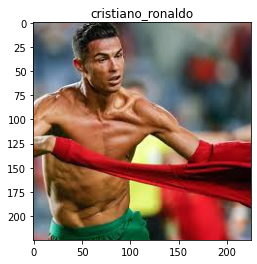

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

target_class = random.choice(class_names)
target_folder: str = "/content/dataset_splitted/train/" + target_class

# Get a random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
img = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(img)
plt.title(target_class)

print(f"Image shape: {img.shape}")

In [ ]:
BATCH_SIZE: int = 32
EPOCHS: int = 30
AUGMENTATION_FACTOR: float = 0.2
LABEL_MODE: str = "categorical"
IMAGE_SIZE = (300, 300)

TRAIN_DIR: str = "/content/dataset_splitted/train"
TEST_DIR: str = "/content/dataset_splitted/val"

In [ ]:
print("training set")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TRAIN_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    shuffle=True
)

print("testing data")
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TEST_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    shuffle=False
)

training set
Found 5739 files belonging to 22 classes.
testing data
Found 1449 files belonging to 22 classes.


In [ ]:
class_names = train_data.class_names
class_names

['alessandro_del_piero',
 'andreas_iniesta',
 'andriy_shevchenko',
 'cristiano_ronaldo',
 'didier_drogba',
 'diego_maradona',
 'edinson_cavani',
 'francesco_totti',
 'gianlugi_buffon',
 'iker_casillas',
 'lionel_messi',
 'luka_modric',
 'mohamed_salah',
 'pavel_nedved',
 'pele',
 'riyan_giggs',
 'roberto_baggio',
 'roberto_carlos',
 'ronaldinho',
 'ronaldo_nazario',
 'samuel_eto',
 'zlatan_ibrahimovic']

In [ ]:
from tensorflow.keras.layers import Dense, Input, RandomRotation, RandomFlip, RandomZoom, RandomHeight, RandomWidth, GlobalAveragePooling2D
from tensorflow.keras import Sequential

augmentation_layer = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(AUGMENTATION_FACTOR),
    RandomZoom(AUGMENTATION_FACTOR),
    RandomHeight(AUGMENTATION_FACTOR),
    RandomWidth(AUGMENTATION_FACTOR)
], name="augmentation_layer")

augmentation_layer

/content/dataset_splitted/train/alessandro_del_piero/b05b95ebf2.jpg


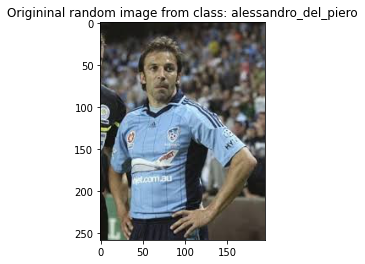

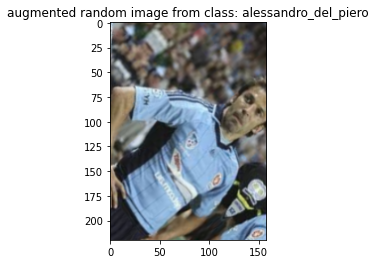

In [ ]:
target_dir = "/content/dataset_splitted/train"
target_class = random.choice(class_names)
target_dir = f"{target_dir}/{target_class}"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

print(random_image_path)
# Read in the random image
img = mpimg.imread(random_image_path)
plt.title(f"Origininal random image from class: {target_class}")
# plt.axis(False)
plt.imshow(img);

# Now lets plot our augmented random image
augmented_image = augmentation_layer(img, training=True)
plt.figure()
plt.title(f"augmented random image from class: {target_class}")
plt.imshow(augmented_image / 255.)

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')


base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True
print(len(base_model.layers))
for layer in base_model.layers[:-60]:
  layer.trainable = False

input_layer = Input(shape=IMAGE_SIZE + (3, ), name="input_layer")
x = augmentation_layer(input_layer)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name="global_average_pooling_2d")(x)
x = Dense(320, activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(0.4)(x)
output_layer = Dense(len(class_names), activation=tf.keras.activations.sigmoid, name="output_layer")(x)

model_1 = tf.keras.Model(input_layer, output_layer)

16705208/16705208 [==============================] - 2s 0us/step
238


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2d (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 320)               409920    
                                                                 
 dropout (Dropout)           (None, 320)               0     

In [ ]:
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

In [ ]:
history_1 = model_1.fit(
    train_data,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback
    ]
)

Epoch 1/30
180/180 [==============================] - 174s 782ms/step - loss: 2.3570 - accuracy: 0.3030 - val_loss: 1.4324 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 2/30
180/180 [==============================] - 118s 653ms/step - loss: 1.3158 - accuracy: 0.5947 - val_loss: 1.0253 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 3/30
180/180 [==============================] - 108s 594ms/step - loss: 0.8862 - accuracy: 0.7296 - val_loss: 0.9001 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 4/30
180/180 [==============================] - 106s 577ms/step - loss: 0.6270 - accuracy: 0.8066 - val_loss: 1.0505 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 5/30
180/180 [==============================] - 101s 557ms/step - loss: 0.4936 - accuracy: 0.8503 - val_loss: 0.7923 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 6/30
180/180 [==============================] - 94s 519ms/step - loss: 0.3729 - accuracy: 0.8834 - val_loss: 0.6914 - val_accuracy: 0.8073 - lr: 0.0010
Epoch 7/30
180/180 [===========================

In [ ]:
model_1.evaluate(test_data)

46/46 [==============================] - 7s 147ms/step - loss: 0.4068 - accuracy: 0.9006


[0.40679726004600525, 0.9006211161613464]

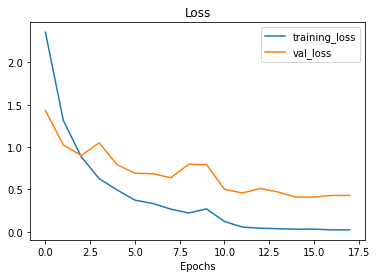

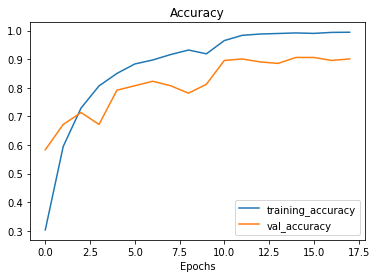

In [ ]:
import matplotlib.pyplot as plt
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

accuracy = history_1.history["accuracy"]
val_accuracy = history_1.history["val_accuracy"]

epochs = range(len(history_1.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()